In [2]:
import os
import numpy as np
import pandas as pd
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)
import seaborn as sns
from sklearn.utils import shuffle
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt


In [3]:
dataset = pd.read_csv('이상치제거.csv', encoding= 'cp949')
dataset.head(10)

,Unnamed: 0,시점,시군산지,일자,품종,도매가격.원.kg.,거래량.톤.,거래금액.백만원.,마늘.면적..ha.,X10a당.생산량..kg.,생산량..톤.,X10a당.생산량.톤,평균,평균기온..C.,일강수량.mm.,평균.풍속.m.s.,합계.일조시간.hr.,평균.지면온도..C.,평균.5cm.지중온도..C.
0,1,2015,철원,2015-07-11,기타,5833,0.02,0.11,307,777,2385,0.777,0.020000,19.655000,6.984375,1.670718,6.382320,21.770166,22.154190
1,2,2015,철원,2015-07-10,기타,6875,0.02,0.11,307,777,2385,0.777,0.020000,19.635556,6.984375,1.661326,6.392265,21.734254,22.115642
2,3,2015,평창,2015-08-06,햇마늘 한지,10000,0.01,0.10,307,777,2385,0.777,0.010000,19.214917,7.308475,1.570166,6.323204,21.660773,22.070950
3,4,2015,홍천,2015-09-21,저장형 한지,3125,0.04,0.13,307,777,2385,0.777,0.040000,15.548066,7.444286,1.483425,4.768508,17.203867,17.888268
4,5,2016,강릉,2016-07-02,햇마늘 한지,2500,0.04,0.10,180,807,1452,0.807,0.040000,20.027072,11.755263,1.431492,6.052486,23.000552,22.607735
5,6,2016,삼척,2016-07-13,햇마늘 한지,3980,1.75,6.97,180,807,1452,0.807,2.238182,20.300000,12.272000,1.389503,5.949724,23.381768,23.023204
6,7,2016,삼척,2016-07-11,햇마늘 한지,3121,3.82,11.92,180,807,1452,0.807,2.238182,20.290608,12.182895,1.395580,5.925967,23.339227,22.969061
7,8,2016,삼척,2016-07-04,햇마늘 한지,2523,2.56,6.46,180,807,1452,0.807,2.238182,20.103867,11.878667,1.423757,6.004420,23.079558,22.697238
8,9,2016,삼척,2016-06-14,햇마늘 한지,4683,1.45,6.80,180,807,1452,0.807,2.238182,18.996685,11.550667,1.517680,6.392818,21.824862,21.267403
9,10,2016,삼척,2016-06-29,햇마늘 한지,3847,1.94,7.46,180,807,1452,0.807,2.238182,19.933149,12.064865,1.438122,6.180663,22.882873,22.449724


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1352 entries, 0 to 1351
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       1352 non-null   int64  
 1   시점               1352 non-null   int64  
 2   시군산지             1352 non-null   object 
 3   일자               1352 non-null   object 
 4   품종               1352 non-null   object 
 5   도매가격.원.kg.       1352 non-null   int64  
 6   거래량.톤.           1352 non-null   float64
 7   거래금액.백만원.        1352 non-null   float64
 8   마늘.면적..ha.       1352 non-null   int64  
 9   X10a당.생산량..kg.   1352 non-null   int64  
 10  생산량..톤.          1352 non-null   int64  
 11  X10a당.생산량.톤      1352 non-null   float64
 12  평균               1352 non-null   float64
 13  평균기온..C.         1352 non-null   float64
 14  일강수량.mm.         1352 non-null   float64
 15  평균.풍속.m.s.       1352 non-null   float64
 16  합계.일조시간.hr.      1352 non-null   float64
 17  평균.지면온도..C.   

In [5]:
nan = dataset.isnull().sum()
nan

Unnamed: 0         0
시점                 0
시군산지               0
일자                 0
품종                 0
도매가격.원.kg.         0
거래량.톤.             0
거래금액.백만원.          0
마늘.면적..ha.         0
X10a당.생산량..kg.     0
생산량..톤.            0
X10a당.생산량.톤        0
평균                 0
평균기온..C.           0
일강수량.mm.           0
평균.풍속.m.s.         0
합계.일조시간.hr.        0
평균.지면온도..C.        0
평균.5cm.지중온도..C.    0
dtype: int64

In [6]:
ds_sample = dataset.sample(100)
ds_sample

,Unnamed: 0,시점,시군산지,일자,품종,도매가격.원.kg.,거래량.톤.,거래금액.백만원.,마늘.면적..ha.,X10a당.생산량..kg.,생산량..톤.,X10a당.생산량.톤,평균,평균기온..C.,일강수량.mm.,평균.풍속.m.s.,합계.일조시간.hr.,평균.지면온도..C.,평균.5cm.지중온도..C.
1105,1106,2020,강릉,2020-03-05,깐마늘,4625,0.020,0.11,236,1049,2476,1.049,0.230037,5.603889,5.155556,2.028177,5.760221,7.495580,7.103333
92,93,2018,강릉,2018-02-09,풋마늘,6417,0.010,0.08,265,754,1999,0.754,0.052314,1.796133,6.107692,2.183425,5.650276,3.795028,3.381215
253,254,2018,강릉,2018-03-06,풋마늘,6364,0.030,0.18,265,754,1999,0.754,0.052314,4.154696,7.809259,2.108287,5.902762,6.344751,5.595580
721,722,2019,원주,2019-04-03,깐마늘,5188,0.430,2.21,239,780,1865,0.780,0.323701,8.519890,6.035714,1.844751,5.882873,11.079006,10.067403
707,708,2019,원주,2019-12-11,깐마늘,3451,0.570,1.95,239,780,1865,0.780,0.323701,5.307778,7.413462,1.648066,4.455249,6.925967,7.094444
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
819,820,2019,원주,2019-08-01,깐마늘,3842,0.760,2.92,239,780,1865,0.780,0.323701,19.645856,8.267606,1.514917,4.342541,23.073481,22.527072
715,716,2019,원주,2019-05-03,깐마늘,4821,0.030,0.13,239,780,1865,0.780,0.323701,12.848066,6.462712,1.814365,5.316022,15.660773,14.589503
639,640,2019,강원고성,2019-05-25,햇마늘 한지,1600,0.010,0.02,239,780,1865,0.780,0.095153,16.003867,6.477612,1.745304,5.078453,19.016575,18.038674
1077,1078,2020,강릉,2020-05-30,마늘쫑,6600,0.002,0.01,236,1049,2476,1.049,0.230037,16.549171,10.233333,1.868508,5.816575,19.724862,18.817680


In [7]:
ds_isnull = dataset.isnull().sum()
ds_isnull

Unnamed: 0         0
시점                 0
시군산지               0
일자                 0
품종                 0
도매가격.원.kg.         0
거래량.톤.             0
거래금액.백만원.          0
마늘.면적..ha.         0
X10a당.생산량..kg.     0
생산량..톤.            0
X10a당.생산량.톤        0
평균                 0
평균기온..C.           0
일강수량.mm.           0
평균.풍속.m.s.         0
합계.일조시간.hr.        0
평균.지면온도..C.        0
평균.5cm.지중온도..C.    0
dtype: int64

In [8]:
df_desc = dataset.describe() 


In [9]:
corrmat = dataset.corr()
corrmat

,Unnamed: 0,시점,도매가격.원.kg.,거래량.톤.,거래금액.백만원.,마늘.면적..ha.,X10a당.생산량..kg.,생산량..톤.,X10a당.생산량.톤,평균,평균기온..C.,일강수량.mm.,평균.풍속.m.s.,합계.일조시간.hr.,평균.지면온도..C.,평균.5cm.지중온도..C.
Unnamed: 0,1.000000,0.906633,-0.386548,0.229882,0.254505,-0.632155,0.748124,0.536155,0.748124,0.291798,0.170259,-0.332893,0.025917,-0.092003,0.143855,0.153351
시점,0.906633,1.000000,-0.321400,0.092314,0.090828,-0.532295,0.769638,0.611228,0.769638,0.114236,0.130021,-0.267290,0.040835,-0.108182,0.109948,0.116758
도매가격.원.kg.,-0.386548,-0.321400,1.000000,-0.291936,-0.119280,0.371188,-0.310435,-0.167426,-0.310435,-0.278684,-0.167602,0.149462,0.099631,0.133844,-0.149396,-0.162314
거래량.톤.,0.229882,0.092314,-0.291936,1.000000,0.844353,-0.227986,0.167116,0.073863,0.167116,0.779188,0.084975,-0.034457,-0.038322,-0.006057,0.074937,0.079894
거래금액.백만원.,0.254505,0.090828,-0.119280,0.844353,1.000000,-0.229171,0.186585,0.094822,0.186585,0.661385,0.045683,-0.033546,-0.018319,-0.008294,0.035862,0.041566
마늘.면적..ha.,-0.632155,-0.532295,0.371188,-0.227986,-0.229171,1.000000,-0.466423,-0.028980,-0.466423,-0.292746,-0.176900,0.348645,0.201830,0.103166,-0.143580,-0.160364
X10a당.생산량..kg.,0.748124,0.769638,-0.310435,0.167116,0.186585,-0.466423,1.000000,0.897631,1.000000,0.209713,0.228828,-0.001806,0.107266,0.142768,0.214139,0.219932
생산량..톤.,0.536155,0.611228,-0.167426,0.073863,0.094822,-0.028980,0.897631,1.000000,0.897631,0.089317,0.170046,0.166634,0.220834,0.209022,0.169856,0.168112
X10a당.생산량.톤,0.748124,0.769638,-0.310435,0.167116,0.186585,-0.466423,1.000000,0.897631,1.000000,0.209713,0.228828,-0.001806,0.107266,0.142768,0.214139,0.219932
평균,0.291798,0.114236,-0.278684,0.779188,0.661385,-0.292746,0.209713,0.089317,0.209713,1.000000,0.108294,-0.032145,-0.043525,0.017491,0.096307,0.101245


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


<AxesSubplot:>

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\textpath.py:74: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)


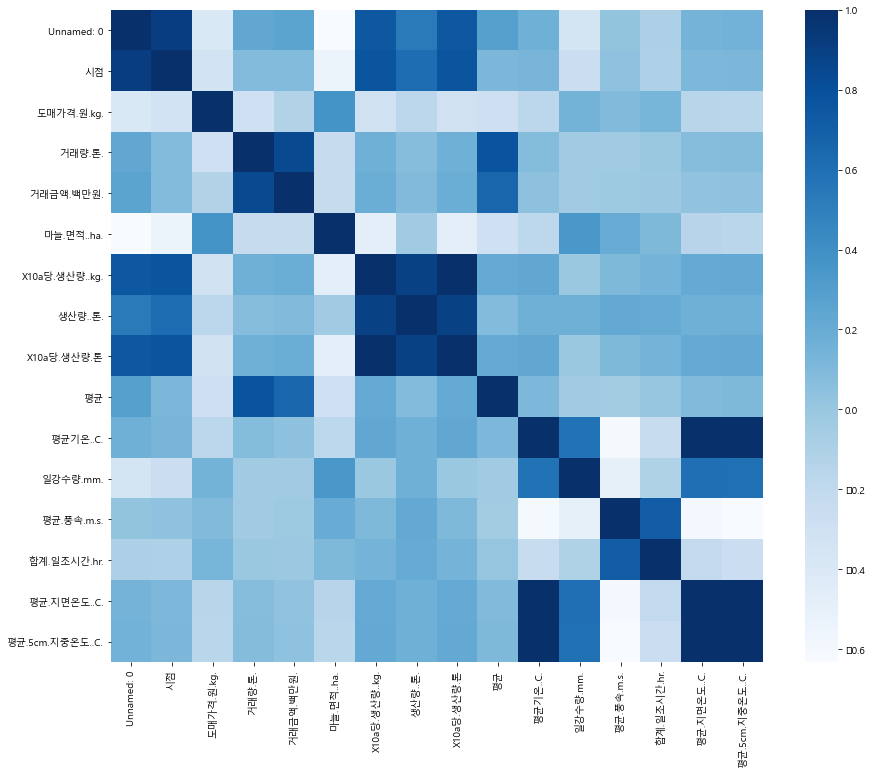

In [10]:
plt.subplots(figsize=(15,12))
sns.heatmap(corrmat, vmax=1, cmap="Blues", square=True)

<AxesSubplot:>

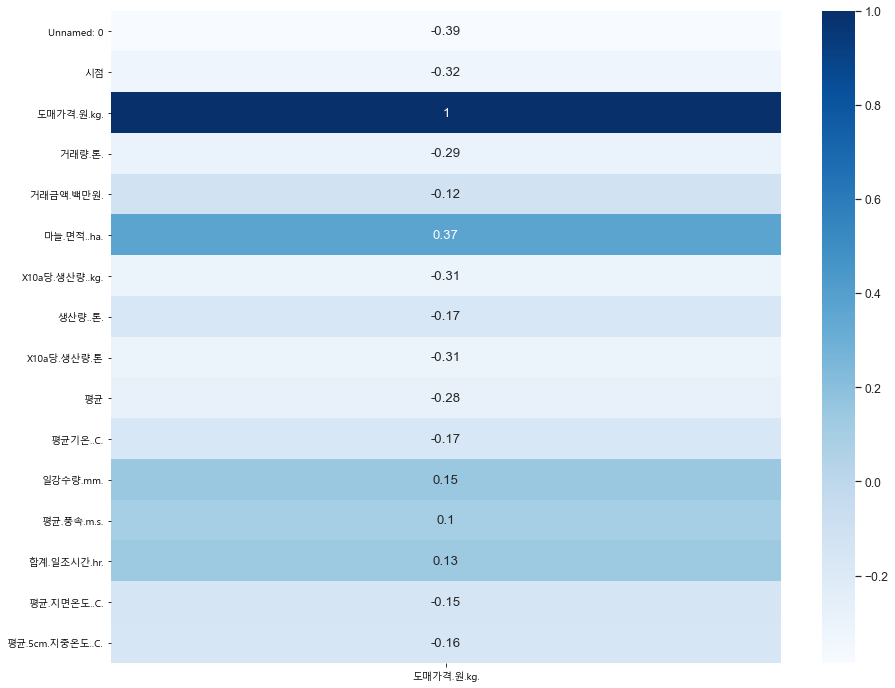

In [11]:
averagePrice = dataset["도매가격.원.kg."]
corr_averagePrice = dataset.corrwith(averagePrice, axis=0)
corr_averagePrice = pd.DataFrame(corr_averagePrice)
corr_averagePrice.rename (columns = {0: '도매가격.원.kg.'}, inplace = True)

#Oluşturulan korelasyon matrisinin görselleştirilmesi
plt.subplots(figsize=(15,12))
sns.set(font_scale=1.1)
sns.heatmap(corr_averagePrice, vmax=1, cmap="Blues",annot=True)

In [12]:
df = dataset.drop(columns = ["Unnamed: 0"])
df


,시점,시군산지,일자,품종,도매가격.원.kg.,거래량.톤.,거래금액.백만원.,마늘.면적..ha.,X10a당.생산량..kg.,생산량..톤.,X10a당.생산량.톤,평균,평균기온..C.,일강수량.mm.,평균.풍속.m.s.,합계.일조시간.hr.,평균.지면온도..C.,평균.5cm.지중온도..C.
0,2015,철원,2015-07-11,기타,5833,0.020,0.11,307,777,2385,0.777,0.020000,19.655000,6.984375,1.670718,6.382320,21.770166,22.154190
1,2015,철원,2015-07-10,기타,6875,0.020,0.11,307,777,2385,0.777,0.020000,19.635556,6.984375,1.661326,6.392265,21.734254,22.115642
2,2015,평창,2015-08-06,햇마늘 한지,10000,0.010,0.10,307,777,2385,0.777,0.010000,19.214917,7.308475,1.570166,6.323204,21.660773,22.070950
3,2015,홍천,2015-09-21,저장형 한지,3125,0.040,0.13,307,777,2385,0.777,0.040000,15.548066,7.444286,1.483425,4.768508,17.203867,17.888268
4,2016,강릉,2016-07-02,햇마늘 한지,2500,0.040,0.10,180,807,1452,0.807,0.040000,20.027072,11.755263,1.431492,6.052486,23.000552,22.607735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1347,2020,횡성,2020-09-03,깐마늘,5500,0.006,0.03,236,1049,2476,1.049,0.074962,17.055801,12.382278,1.549171,4.667403,20.296133,19.737017
1348,2020,횡성,2020-07-31,깐마늘,5300,0.010,0.07,236,1049,2476,1.049,0.074962,19.151381,11.896591,1.540331,4.939227,22.667403,21.890608
1349,2020,횡성,2020-08-07,깐마늘,4900,0.010,0.07,236,1049,2476,1.049,0.074962,18.760221,12.016092,1.549171,4.937017,22.270718,21.537017
1350,2020,횡성,2020-06-01,마늘쫑,5245,0.030,0.17,236,1049,2476,1.049,0.074962,16.776796,10.508046,1.856906,5.798343,19.967403,19.060221


In [13]:
y = df["도매가격.원.kg."]
X = df[['시점', '거래량.톤.', '거래금액.백만원.', '마늘.면적..ha.',
       'X10a당.생산량..kg.', '생산량..톤.', 'X10a당.생산량.톤', '평균', '평균기온..C.',
       '일강수량.mm.', '평균.풍속.m.s.', '합계.일조시간.hr.', '평균.지면온도..C.',
       '평균.5cm.지중온도..C.']]

X, y = shuffle(X, y, random_state = 7)

In [ ]:
#  70% of the data will be used for train
#  30% will be used for testing

row_size = df.shape[0]  
offset = int(row_size * 0.7) 

# X_train = X[:] overfit olur 
X_train = X[:offset]  # Generating X_train data
X_test = X[offset:]   # Generating X_test data


y_train = y[:offset]  # Generating y_train data
y_test = y[offset:]  # yGenerating y_test data

In [ ]:
model = RandomForestRegressor()

tuned = model.fit(X_train, y_train)

y_pred = model.predict(X_test)
y_pred

array([3750.17      , 6882.15      , 6577.63      , 6823.92      ,
       3022.2       , 3242.94      , 6916.3       , 6576.71      ,
       4011.46      , 5744.04      , 2312.08      , 6728.38      ,
       5969.66      , 2987.07      , 5896.7       , 3003.99      ,
       2379.45      , 7253.9       , 3010.29      , 5804.87      ,
       6157.01      , 3799.56      , 2795.34      , 4227.79      ,
       2206.21      , 7120.35      , 5871.87      , 6341.18      ,
       4629.56      , 6955.73      , 4042.17      , 6019.39      ,
       5877.87      , 2801.47      , 7017.47      , 6918.11      ,
       4518.87      , 3796.56      , 2677.92      , 3444.68      ,
       6950.68      , 6383.        , 2307.6       , 6407.42      ,
       5311.65      , 7727.62      , 2594.46      , 5879.41      ,
       2230.83      , 3199.84      , 6210.18      , 6912.87      ,
       6634.82      , 6187.31      , 3281.9       , 6549.3       ,
       2152.03      , 3039.39      , 5040.11      , 6549.72   

In [ ]:
# score
score_r2 = metrics.r2_score(y_test, y_pred)
score_r2


0.8510878876596862

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\textpath.py:74: RuntimeWarning: Glyph 49884 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\textpath.py:74: RuntimeWarning: Glyph 51216 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\textpath.py:74: RuntimeWarning: Glyph 44144 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\textpath.py:74: RuntimeWarning: Glyph 47000 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\textpath.py:74: RuntimeWarning: Glyph 47049 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\textpath.py:74: RuntimeWarning: Glyph 53668 missing from current font.
  font.set_text

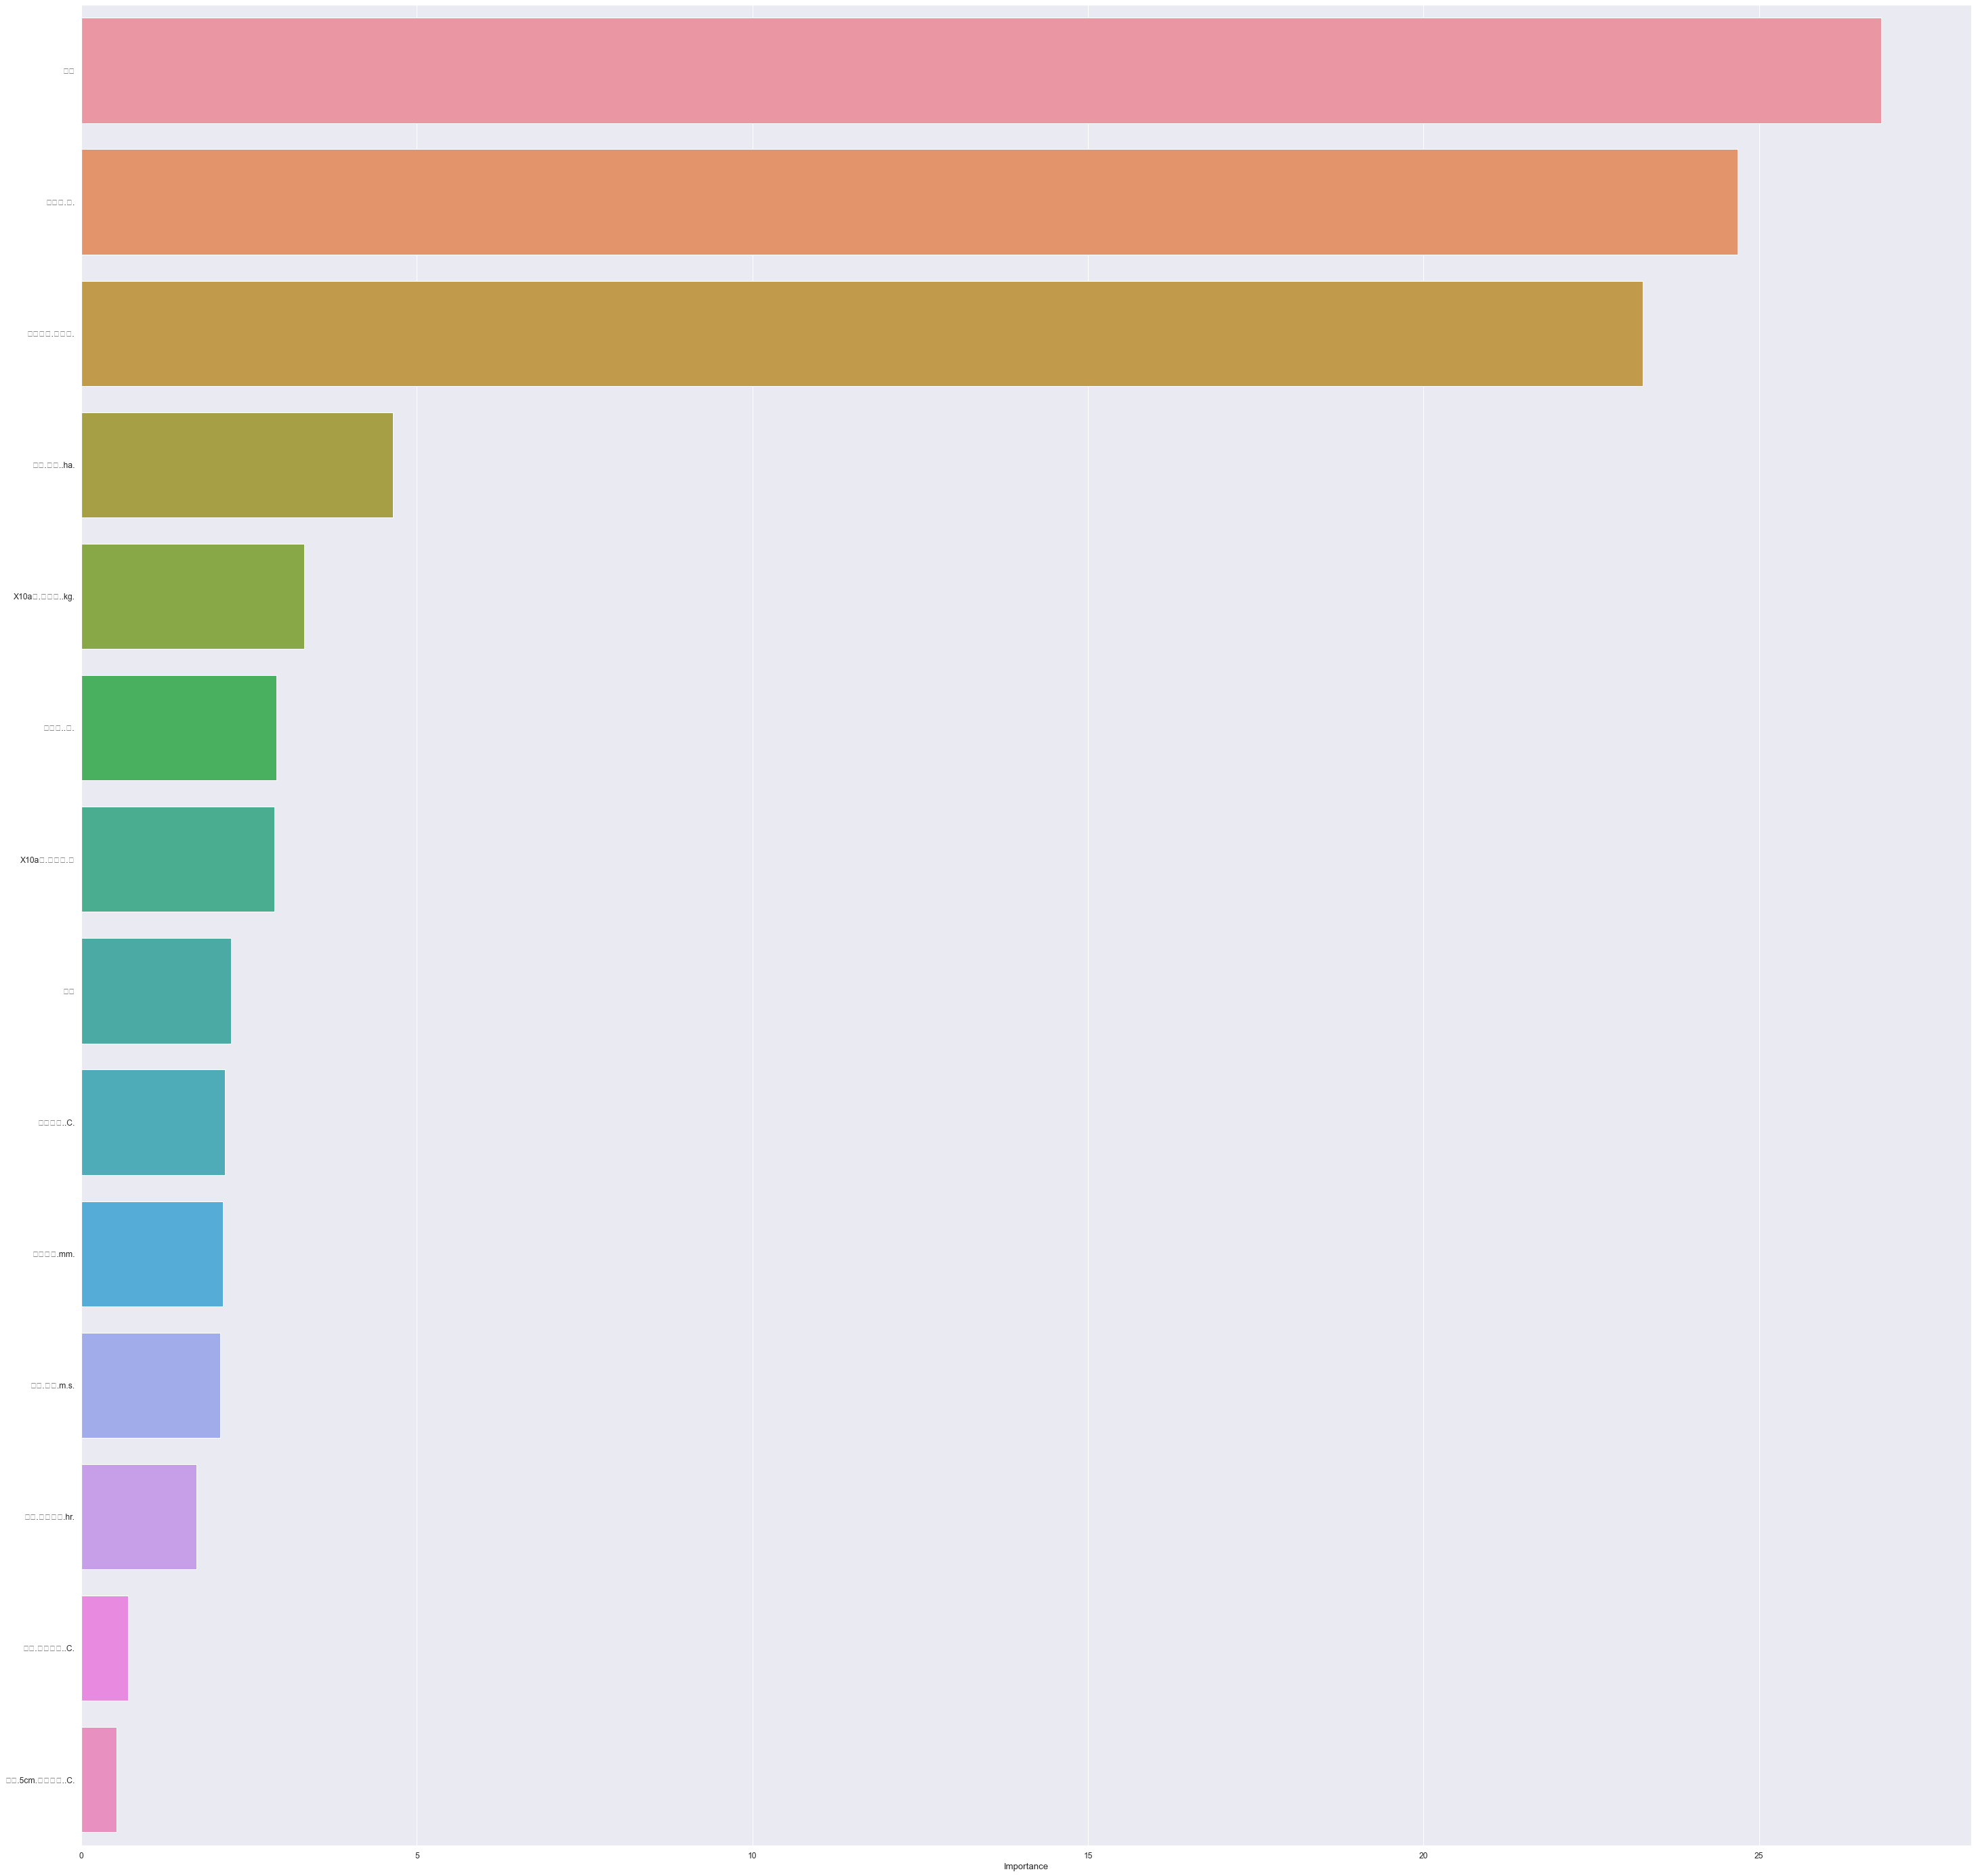

In [ ]:

rf_Importance = pd.DataFrame({"Importance":tuned.feature_importances_*100},index = X_train.columns)

s = rf_Importance.sort_values(by = "Importance", axis=0, ascending = False)
fig_dims = (50, 50)
fig, ax = plt.subplots(figsize=fig_dims)
sns.barplot(x = "Importance", y =  rf_Importance["Importance"].index, ax=ax, data=s) ;sns.set(font="Malgun Gothic", 
        rc={"axes.unicode_minus":False},
        style='darkgrid')


In [ ]:
new_train_columns = []

for index, row in rf_Importance.iterrows():
    if(row["Importance"] >= 0.06):
        new_train_columns.append(index)
    
new_train = X_train[new_train_columns]

X_train = new_train
X_test = X_test[new_train_columns]

model = RandomForestRegressor()

tuned = model.fit(X_train, y_train)

y_pred = model.predict(X_test )
y_pred

array([3622.47      , 6872.14      , 6579.88      , 6879.54      ,
       3077.54      , 3262.47      , 6948.52      , 6580.45      ,
       3840.67      , 5736.85      , 2142.18      , 6891.35      ,
       6307.87      , 3004.08      , 5917.67      , 2966.69      ,
       2624.16      , 7327.51      , 3087.15      , 5821.33      ,
       6139.11      , 3701.62      , 2770.55      , 4280.72      ,
       2157.57      , 7173.09      , 6082.56      , 6353.5       ,
       4467.32      , 6931.11      , 4083.28      , 6018.43      ,
       5929.69      , 3035.96      , 6960.        , 6889.78      ,
       4342.52      , 3751.4       , 3049.99      , 3399.3       ,
       7035.74      , 6391.4       , 2298.63      , 6108.96      ,
       5218.85      , 7298.97      , 3172.6       , 5902.68      ,
       2288.85      , 3205.52      , 6203.11      , 6991.05      ,
       6594.28      , 6202.79      , 3120.26      , 6640.67      ,
       2345.69      , 3112.59      , 5144.67      , 6257.13   

In [17]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, y_pred)

print(mse)

NameError: name 'y_test' is not defined

In [ ]:
score_r2 = metrics.r2_score(y_test, y_pred)
score_r2

0.8585014327387266